In [1]:
import os
import numpy as np
import pandas as pd
from google.cloud import bigquery

# Get The Data

In [2]:
def get_bq_data(table):
    PROJECT = "le-wagon-hedge-fund"
    client = bigquery.Client(project=PROJECT)
    DATASET = "data_alpaca_20240604"
    query = f'''
    SELECT * FROM {PROJECT}.{DATASET}.{table}
    '''
    query_job = client.query(query)
    results = query_job.result()
    return results.to_dataframe()

In [3]:

raw_data_dir = "../raw_data"
TABLE = "SP500_Historical_Weekly"
saved_table = f"{raw_data_dir}/{TABLE}.csv"
if not os.path.exists(saved_table):
    df = get_bq_data(TABLE)
    df.to_csv(saved_table, index=False)
else:
    df = pd.read_csv(saved_table)
df.shape

(205923, 9)

# Preprocessing

In [4]:
import datetime, pytz
df['timestamp'] = pd.to_datetime(df['timestamp'])
# start_date = datetime.datetime(2016,1,1,0,0,0,0,pytz.UTC)
# df = df[df['timestamp'] > start_date]
df = df[['symbol','timestamp', 'close']]
df.shape

(205923, 3)

In [5]:
max_count = df['symbol'].value_counts().max()
max_count

439

In [6]:
#stocks_in_universe = df['symbol'].value_counts().iloc[:10]
stocks_in_universe = df['symbol'].value_counts().loc[df['symbol'].value_counts()>max_count-1]

df = df[df['symbol'].isin(stocks_in_universe.index)]

In [7]:
start_date = df['timestamp'].min()
# get number of weeks from start_date
df['week'] = (df['timestamp'] - start_date).dt.days / 7
df

symbol                 timestamp   close        week
0        AAPL 2016-01-04 05:00:00+00:00   96.96    0.000000
1        AAPL 2016-01-11 05:00:00+00:00   97.13    1.000000
2        AAPL 2016-01-18 05:00:00+00:00  101.42    2.000000
3        AAPL 2016-01-25 05:00:00+00:00   97.34    3.000000
4        AAPL 2016-02-01 05:00:00+00:00   94.02    4.000000
...       ...                       ...     ...         ...
205918    ZTS 2024-04-29 04:00:00+00:00  167.07  433.857143
205919    ZTS 2024-05-06 04:00:00+00:00  169.04  434.857143
205920    ZTS 2024-05-13 04:00:00+00:00  174.06  435.857143
205921    ZTS 2024-05-20 04:00:00+00:00  170.07  436.857143
205922    ZTS 2024-05-27 04:00:00+00:00  169.56  437.857143

[184819 rows x 4 columns]

In [8]:
closes = df.drop(
    'week',
    axis=1
    ).pivot(
        index='timestamp',
        columns='symbol',
        values='close')
closes

symbol                          A    AAL     AAP    AAPL    ABBV     ABT  \
timestamp                                                                  
2016-01-04 05:00:00+00:00   38.59  40.37  145.56   96.96   55.65   40.67   
2016-01-11 05:00:00+00:00   37.11  38.76  144.29   97.13   57.34   40.54   
2016-01-18 05:00:00+00:00   37.98  40.16  144.43  101.42   58.83   40.03   
2016-01-25 05:00:00+00:00   37.65  38.99  152.05   97.34   54.90   37.85   
2016-02-01 05:00:00+00:00   36.04  36.75  143.94   94.02   53.12   37.41   
...                           ...    ...     ...     ...     ...     ...   
2024-04-29 04:00:00+00:00  139.45  13.85   76.31  183.38  163.79  105.90   
2024-05-06 04:00:00+00:00  149.76  14.40   75.03  183.05  160.75  104.74   
2024-05-13 04:00:00+00:00  154.23  14.73   74.55  189.87  166.42  104.09   
2024-05-20 04:00:00+00:00  150.66  13.84   69.57  189.98  157.06  103.95   
2024-05-27 04:00:00+00:00  130.41  11.50   70.64  192.25  161.24  102.19   

symbol                        ACN    ADBE     ADI    ADM  ...   WYNN    XEL  \
timestamp                                                 ...                 
2016-01-04 05:00:00+00:00   98.20   87.85   49.98  34.39  ...  57.74  36.18   
2016-01-11 05:00:00+00:00   99.27   89.17   49.82  31.51  ...  58.37  36.50   
2016-01-18 05:00:00+00:00  102.24   89.63   51.38  33.23  ...  59.17  36.63   
2016-01-25 05:00:00+00:00  105.54   89.13   53.86  35.35  ...  67.34  38.22   
2016-02-01 05:00:00+00:00   98.97   79.20   49.82  34.07  ...  61.91  39.53   
...                           ...     ...     ...    ...  ...    ...    ...   
2024-04-29 04:00:00+00:00  303.71  486.18  199.63  59.17  ...  96.71  54.25   
2024-05-06 04:00:00+00:00  306.33  482.29  207.19  62.98  ...  96.39  55.46   
2024-05-13 04:00:00+00:00  303.59  483.43  214.08  61.62  ...  96.79  55.52   
2024-05-20 04:00:00+00:00  300.99  475.43  232.51  60.49  ...  94.62  53.72   
2024-05-27 04:00:00+00:00  282.29  444.76  234.49  62.44  ...  94.88  55.45   

symbol                        XOM   XRAY    XRX     XYL     YUM     ZBH  \
timestamp                                                                 
2016-01-04 05:00:00+00:00   74.69  56.99   9.59   34.37   68.14  101.55   
2016-01-11 05:00:00+00:00   77.58  56.49   9.10   32.98   67.09  101.08   
2016-01-18 05:00:00+00:00   76.57  57.52   9.07   34.03   68.98   99.15   
2016-01-25 05:00:00+00:00   77.85  58.89   9.75   35.95   72.37   99.26   
2016-02-01 05:00:00+00:00   80.08  58.99   9.46   36.66   69.76   95.01   
...                           ...    ...    ...     ...     ...     ...   
2024-04-29 04:00:00+00:00  116.00  28.29  13.36  137.21  134.34  121.66   
2024-05-06 04:00:00+00:00  117.96  27.89  13.54  143.00  137.62  121.31   
2024-05-13 04:00:00+00:00  119.64  28.28  13.95  143.32  141.66  120.18   
2024-05-20 04:00:00+00:00  113.42  27.46  13.86  144.25  137.65  116.41   
2024-05-27 04:00:00+00:00  117.26  28.01  14.06  141.02  137.43  115.15   

symbol                      ZION     ZTS  
timestamp                                 
2016-01-04 05:00:00+00:00  24.60   45.88  
2016-01-11 05:00:00+00:00  22.34   43.38  
2016-01-18 05:00:00+00:00  21.51   43.40  
2016-01-25 05:00:00+00:00  22.68   43.05  
2016-02-01 05:00:00+00:00  21.63   40.91  
...                          ...     ...  
2024-04-29 04:00:00+00:00  43.62  167.07  
2024-05-06 04:00:00+00:00  44.32  169.04  
2024-05-13 04:00:00+00:00  44.96  174.06  
2024-05-20 04:00:00+00:00  43.09  170.07  
2024-05-27 04:00:00+00:00  43.19  169.56  

[439 rows x 421 columns]

## change the index to have a consistent frequency

In [9]:
# check the frequency of the index

closes.index.to_series().diff().value_counts()

timestamp
7 days 00:00:00    421
6 days 23:00:00      9
7 days 01:00:00      8
Name: count, dtype: int64

In [10]:
new_index = pd.date_range(start=start_date, periods=len(closes), freq='7D')
closes.index = new_index
closes.index.to_series().diff().value_counts()
closes.index.name = 'timestamp'

In [11]:
closes_weekly = df.drop(
    'timestamp',
    axis=1
    ).pivot(
        index='week',
        columns='symbol',
        values='close')
closes_weekly.index = closes_weekly.index.round(0).astype(int)
closes_weekly

symbol       A    AAL     AAP    AAPL    ABBV     ABT     ACN    ADBE     ADI  \
week                                                                            
0        38.59  40.37  145.56   96.96   55.65   40.67   98.20   87.85   49.98   
1        37.11  38.76  144.29   97.13   57.34   40.54   99.27   89.17   49.82   
2        37.98  40.16  144.43  101.42   58.83   40.03  102.24   89.63   51.38   
3        37.65  38.99  152.05   97.34   54.90   37.85  105.54   89.13   53.86   
4        36.04  36.75  143.94   94.02   53.12   37.41   98.97   79.20   49.82   
...        ...    ...     ...     ...     ...     ...     ...     ...     ...   
434     139.45  13.85   76.31  183.38  163.79  105.90  303.71  486.18  199.63   
435     149.76  14.40   75.03  183.05  160.75  104.74  306.33  482.29  207.19   
436     154.23  14.73   74.55  189.87  166.42  104.09  303.59  483.43  214.08   
437     150.66  13.84   69.57  189.98  157.06  103.95  300.99  475.43  232.51   
438     130.41  11.50   70.64  192.25  161.24  102.19  282.29  444.76  234.49   

symbol    ADM  ...   WYNN    XEL     XOM   XRAY    XRX     XYL     YUM  \
week           ...                                                       
0       34.39  ...  57.74  36.18   74.69  56.99   9.59   34.37   68.14   
1       31.51  ...  58.37  36.50   77.58  56.49   9.10   32.98   67.09   
2       33.23  ...  59.17  36.63   76.57  57.52   9.07   34.03   68.98   
3       35.35  ...  67.34  38.22   77.85  58.89   9.75   35.95   72.37   
4       34.07  ...  61.91  39.53   80.08  58.99   9.46   36.66   69.76   
...       ...  ...    ...    ...     ...    ...    ...     ...     ...   
434     59.17  ...  96.71  54.25  116.00  28.29  13.36  137.21  134.34   
435     62.98  ...  96.39  55.46  117.96  27.89  13.54  143.00  137.62   
436     61.62  ...  96.79  55.52  119.64  28.28  13.95  143.32  141.66   
437     60.49  ...  94.62  53.72  113.42  27.46  13.86  144.25  137.65   
438     62.44  ...  94.88  55.45  117.26  28.01  14.06  141.02  137.43   

symbol     ZBH   ZION     ZTS  
week                           
0       101.55  24.60   45.88  
1       101.08  22.34   43.38  
2        99.15  21.51   43.40  
3        99.26  22.68   43.05  
4        95.01  21.63   40.91  
...        ...    ...     ...  
434     121.66  43.62  167.07  
435     121.31  44.32  169.04  
436     120.18  44.96  174.06  
437     116.41  43.09  170.07  
438     115.15  43.19  169.56  

[439 rows x 421 columns]

In [12]:
returns = closes.pct_change().dropna()
returns

symbol                            A       AAL       AAP      AAPL      ABBV  \
timestamp                                                                     
2016-01-11 05:00:00+00:00 -0.038352 -0.039881 -0.008725  0.001753  0.030368   
2016-01-18 05:00:00+00:00  0.023444  0.036120  0.000970  0.044168  0.025985   
2016-01-25 05:00:00+00:00 -0.008689 -0.029133  0.052759 -0.040229 -0.066803   
2016-02-01 05:00:00+00:00 -0.042762 -0.057451 -0.053338 -0.034107 -0.032423   
2016-02-08 05:00:00+00:00  0.004994  0.029116 -0.022023 -0.000319 -0.010166   
...                             ...       ...       ...       ...       ...   
2024-04-29 05:00:00+00:00  0.012415 -0.002161  0.015571  0.083166  0.026125   
2024-05-06 05:00:00+00:00  0.073933  0.039711 -0.016774 -0.001800 -0.018560   
2024-05-13 05:00:00+00:00  0.029848  0.022917 -0.006397  0.037258  0.035272   
2024-05-20 05:00:00+00:00 -0.023147 -0.060421 -0.066801  0.000579 -0.056243   
2024-05-27 05:00:00+00:00 -0.134409 -0.169075  0.015380  0.011949  0.026614   

symbol                          ABT       ACN      ADBE       ADI       ADM  \
timestamp                                                                     
2016-01-11 05:00:00+00:00 -0.003196  0.010896  0.015026 -0.003201 -0.083745   
2016-01-18 05:00:00+00:00 -0.012580  0.029918  0.005159  0.031313  0.054586   
2016-01-25 05:00:00+00:00 -0.054459  0.032277 -0.005578  0.048268  0.063798   
2016-02-01 05:00:00+00:00 -0.011625 -0.062251 -0.111410 -0.075009 -0.036209   
2016-02-08 05:00:00+00:00 -0.007485 -0.043144 -0.031944 -0.003613 -0.047549   
...                             ...       ...       ...       ...       ...   
2024-04-29 05:00:00+00:00 -0.015159 -0.013961  0.018050 -0.011586 -0.015474   
2024-05-06 05:00:00+00:00 -0.010954  0.008627 -0.008001  0.037870  0.064391   
2024-05-13 05:00:00+00:00 -0.006206 -0.008945  0.002364  0.033255 -0.021594   
2024-05-20 05:00:00+00:00 -0.001345 -0.008564 -0.016548  0.086089 -0.018338   
2024-05-27 05:00:00+00:00 -0.016931 -0.062128 -0.064510  0.008516  0.032237   

symbol                     ...      WYNN       XEL       XOM      XRAY  \
timestamp                  ...                                           
2016-01-11 05:00:00+00:00  ...  0.010911  0.008845  0.038693 -0.008773   
2016-01-18 05:00:00+00:00  ...  0.013706  0.003562 -0.013019  0.018233   
2016-01-25 05:00:00+00:00  ...  0.138077  0.043407  0.016717  0.023818   
2016-02-01 05:00:00+00:00  ... -0.080636  0.034275  0.028645  0.001698   
2016-02-08 05:00:00+00:00  ...  0.116782 -0.017961  0.011863 -0.072216   
...                        ...       ...       ...       ...       ...   
2024-04-29 05:00:00+00:00  ...  0.008657  0.005374 -0.016616 -0.074583   
2024-05-06 05:00:00+00:00  ... -0.003309  0.022304  0.016897 -0.014139   
2024-05-13 05:00:00+00:00  ...  0.004150  0.001082  0.014242  0.013984   
2024-05-20 05:00:00+00:00  ... -0.022420 -0.032421 -0.051989 -0.028996   
2024-05-27 05:00:00+00:00  ...  0.002748  0.032204  0.033856  0.020029   

symbol                          XRX       XYL       YUM       ZBH      ZION  \
timestamp                                                                     
2016-01-11 05:00:00+00:00 -0.051095 -0.040442 -0.015409 -0.004628 -0.091870   
2016-01-18 05:00:00+00:00 -0.003297  0.031837  0.028171 -0.019094 -0.037153   
2016-01-25 05:00:00+00:00  0.074972  0.056421  0.049145  0.001109  0.054393   
2016-02-01 05:00:00+00:00 -0.029744  0.019750 -0.036065 -0.042817 -0.046296   
2016-02-08 05:00:00+00:00 -0.072939  0.010366 -0.034690 -0.033996 -0.029589   
...                             ...       ...       ...       ...       ...   
2024-04-29 05:00:00+00:00 -0.045714  0.036329 -0.052409  0.019355  0.044540   
2024-05-06 05:00:00+00:00  0.013473  0.042198  0.024416 -0.002877  0.016048   
2024-05-13 05:00:00+00:00  0.030281  0.002238  0.029356 -0.009315  0.014440   
2024-05-20 05:00:00+00:00 -0.006452  0.006489 -0.028307 -0.031370 -0.041593   
2024-05-27 05:00:00+00:00  0.0144

In [13]:
cov_returns = returns.cov()
cov_returns

symbol         A       AAL       AAP      AAPL      ABBV       ABT       ACN  \
symbol                                                                         
A       0.001200  0.000889  0.000683  0.000646  0.000431  0.000638  0.000677   
AAL     0.000889  0.006024  0.001522  0.000840  0.000480  0.000545  0.001003   
AAP     0.000683  0.001522  0.003086  0.000642  0.000737  0.000595  0.000770   
AAPL    0.000646  0.000840  0.000642  0.002765  0.000461  0.000634  0.000719   
ABBV    0.000431  0.000480  0.000737  0.000461  0.001325  0.000557  0.000434   
...          ...       ...       ...       ...       ...       ...       ...   
XYL     0.000755  0.001421  0.000799  0.000595  0.000486  0.000556  0.000697   
YUM     0.000519  0.001227  0.000893  0.000610  0.000442  0.000539  0.000602   
ZBH     0.000679  0.001300  0.000827  0.000603  0.000555  0.000647  0.000673   
ZION    0.000763  0.002204  0.001201  0.000485  0.000551  0.000382  0.000772   
ZTS     0.000727  0.000796  0.000682  0.000722  0.000538  0.000665  0.000673   

symbol      ADBE       ADI       ADM  ...      WYNN       XEL       XOM  \
symbol                                ...                                 
A       0.000784  0.000771  0.000470  ...  0.000861  0.000272  0.000430   
AAL     0.000826  0.001303  0.000818  ...  0.002813  0.000466  0.001176   
AAP     0.000608  0.000705  0.000688  ...  0.001256  0.000606  0.000756   
AAPL    0.001010  0.000799  0.000307  ...  0.000938  0.000348  0.000323   
ABBV    0.000411  0.000336  0.000336  ...  0.000580  0.000344  0.000414   
...          ...       ...       ...  ...       ...       ...       ...   
XYL     0.000617  0.000745  0.000556  ...  0.001216  0.000457  0.000548   
YUM     0.000510  0.000608  0.000424  ...  0.001232  0.000556  0.000518   
ZBH     0.000669  0.000728  0.000565  ...  0.001226  0.000449  0.000660   
ZION    0.000521  0.000871  0.000812  ...  0.001603  0.000274  0.001059   
ZTS     0.000723  0.000616  0.000291  ...  0.000712  0.000441  0.000247   

symbol      XRAY       XRX       XYL       YUM       ZBH      ZION       ZTS  
symbol                                                                        
A       0.000656  0.000768  0.000755  0.000519  0.000679  0.000763  0.000727  
AAL     0.001451  0.001905  0.001421  0.001227  0.001300  0.002204  0.000796  
AAP     0.000886  0.001323  0.000799  0.000893  0.000827  0.001201  0.000682  
AAPL    0.000559  0.000587  0.000595  0.000610  0.000603  0.000485  0.000722  
ABBV    0.000524  0.000740  0.000486  0.000442  0.000555  0.000551  0.000538  
...          ...       ...       ...       ...       ...       ...       ...  
XYL     0.000751  0.000991  0.001416  0.000769  0.000737  0.000963  0.000694  
YUM     0.000643  0.000887  0.000769  0.001309  0.000792  0.000705  0.000582  
ZBH     0.000938  0.001147  0.000737  0.000792  0.001527  0.000902  0.000618  
ZION    0.001038  0.001656  0.000963  0.000705  0.000902  0.002990  0.000518  
ZTS     0.000685  0.000630  0.000694  0.000582  0.000618  0.000518  0.001265  

[421 rows x 421 columns]

In [14]:
closes.to_csv(f"{raw_data_dir}/closes.csv", index=True)

In [15]:
returns.to_csv(f"{raw_data_dir}/returns.csv", index=True)

# Portfolio Optimization

In [151]:
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [152]:
# # Calculate expected returns and sample covariance
# mu = expected_returns.mean_historical_return(closes)
# S = risk_models.sample_cov(closes)
# ef = EfficientFrontier(mu, S)
# weights = ef.max_sharpe()
# ef.portfolio_performance(verbose=True)

In [153]:
from pypfopt.risk_models import CovarianceShrinkage

mu = expected_returns.mean_historical_return(closes)
S = CovarianceShrinkage(closes).ledoit_wolf()

In [154]:
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
#ef.save_weights_to_file("weights.txt")  # saves to file
display(cleaned_weights)

OrderedDict([('AAPL', 0.0),
             ('M', 0.0),
             ('MOS', 0.0),
             ('MS', 0.0),
             ('MSFT', 0.62971),
             ('MSI', 0.23848),
             ('MTB', 0.0),
             ('MTD', 0.0),
             ('MU', 0.13181),
             ('NAVI', 0.0)])

# Time Series Models

In [193]:
closes

symbol                       AAPL      M    MOS      MS    MSFT     MSI  \
timestamp                                                                 
2016-01-04 05:00:00+00:00   96.96  35.89  24.91   28.38   52.33   64.25   
2016-01-11 05:00:00+00:00   97.13  37.88  25.47   25.97   50.99   61.59   
2016-01-18 05:00:00+00:00  101.42  41.35  23.85   25.61   52.29   62.04   
2016-01-25 05:00:00+00:00   97.34  40.41  24.10   25.88   55.09   66.77   
2016-02-01 05:00:00+00:00   94.02  40.26  24.86   24.35   50.16   62.82   
...                           ...    ...    ...     ...     ...     ...   
2024-04-29 05:00:00+00:00  183.38  19.52  28.68   93.64  406.66  353.70   
2024-05-06 05:00:00+00:00  183.05  19.35  29.43   98.28  414.74  362.85   
2024-05-13 05:00:00+00:00  189.87  19.49  30.61  100.22  420.21  367.80   
2024-05-20 05:00:00+00:00  189.98  20.18  30.98   98.97  430.16  364.60   
2024-05-27 05:00:00+00:00  192.25  19.48  30.93   97.84  415.13  364.91   

symbol                        MTB      MTD      MU   NAVI  
timestamp                                                  
2016-01-04 05:00:00+00:00  110.17   313.93   13.33  10.18  
2016-01-11 05:00:00+00:00  104.49   313.62   11.08   9.00  
2016-01-18 05:00:00+00:00  104.58   316.25   11.07   9.24  
2016-01-25 05:00:00+00:00  110.18   312.85   11.03   9.56  
2016-02-01 05:00:00+00:00  107.80   311.68   11.00   9.51  
...                           ...      ...     ...    ...  
2024-04-29 05:00:00+00:00  146.58  1251.95  114.70  15.98  
2024-05-06 05:00:00+00:00  153.66  1510.25  121.24  15.48  
2024-05-13 05:00:00+00:00  153.79  1522.75  125.29  15.42  
2024-05-20 05:00:00+00:00  150.66  1479.53  129.49  15.12  
2024-05-27 05:00:00+00:00  151.60  1404.09  125.00  15.07  

[439 rows x 10 columns]

In [164]:
from darts.timeseries import TimeSeries

series = TimeSeries.from_dataframe(closes).astype(np.float32)
train, test = series.split_after(0.8)

# change the series to float32


The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.


In [173]:
from darts.models import RNNModel
model = RNNModel(
    input_chunk_length=1,
    model='LSTM',
    hidden_dim=20,
    n_rnn_layers=1,
    training_length=len(train))


In [174]:
model.fit(series, verbose=True, epochs=25)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | LSTM             | 2.6 K 
4 | V             | Linear           | 210   
---------------------------------------------------
2.8 K     Trainable params
0         Non-trainable params
2.8 K     Total params
0.011     Total estimated model params size (MB)


Epoch 24: 100%|██████████| 3/3 [00:00<00:00, 45.93it/s, train_loss=1.18e+5]

`Trainer.fit` stopped: `max_epochs=25` reached.


Epoch 24: 100%|██████████| 3/3 [00:00<00:00, 45.53it/s, train_loss=1.18e+5]


RNNModel(model=LSTM, hidden_dim=20, n_rnn_layers=1, dropout=0.0, training_length=351, input_chunk_length=1)

In [175]:
preds = model.predict(n=len(test))

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 22.37it/s]


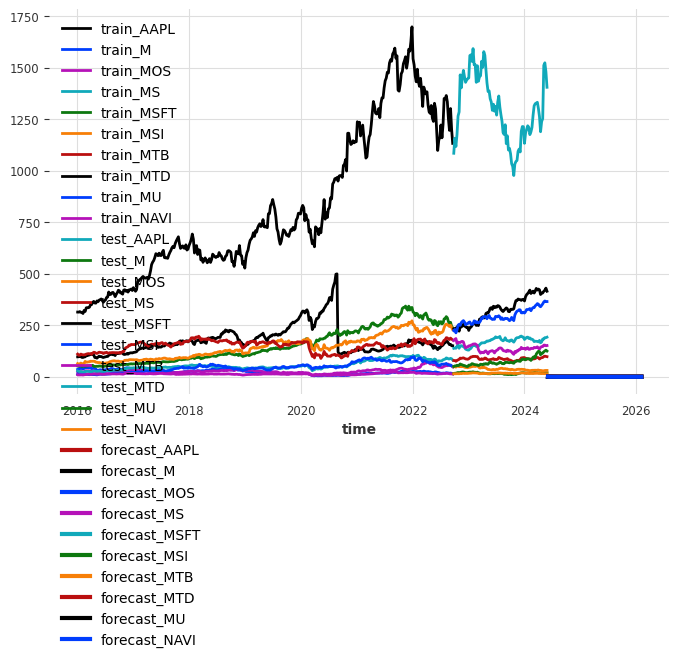

In [172]:
# plot the forecast with the actual data

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
train.plot(label='train')
test.plot(label='test')
preds.plot(label='forecast', lw=3)
plt.legend()
